In [35]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

data_dir = 'UMMC_DATA'
data_files = os.listdir(data_dir)

ground_truth_files = [f for f in data_files if 'ground_truth' in f]
print('ground_truth_files:', len(ground_truth_files))

peak_ref_files = [f for f in data_files if 'Peak_Ref_ECG' in f]
print('peak_ref_files:', len(peak_ref_files))

ecg_30_sec_files = [f for f in data_files if 'ECG_30sec' in f]
print('ecg_30_sec_files:', len(ecg_30_sec_files))

ref_ecg_files = [f for f in data_files if 'RefECG' in f]
print('ref_ecg_files:', len(ref_ecg_files))

info_file = 'UMass_SimbandInfo.mat'
if info_file in data_files:
    print('found info file')
else:
    print('info file is missing!')

ground_truth_files: 41
peak_ref_files: 21
ecg_30_sec_files: 7
ref_ecg_files: 41
found info file


In [36]:
signal_files = set(data_files) - set(ground_truth_files + peak_ref_files + ecg_30_sec_files + ref_ecg_files + [info_file])
signal_files = list(signal_files)
print('signal_files:', len(signal_files))

signal_files: 41


In [37]:
data = scipy.io.loadmat(os.path.join(data_dir, signal_files[0]), matlab_compatible=True, simplify_cells=True)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'RC_CONSOLE_DATABASE', 'RC_DATA_ACCESS_LAYER', 'RC_MATLAB_DIR', 'ans', 'data'])

In [38]:
data['data'].keys()

dict_keys(['band', 'samiParams'])

In [39]:
data['data']['band'].keys()

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

In [40]:
data['data']['band']['physiosignal'].keys()

dict_keys(['ppg2', 'ppg0', 'ecg', 'ppg5', 'ppg6', 'ppg', 'ppg4', 'ppg1', 'ppg3', 'ppg7', 'skinTemperature', 'gsr'])

In [41]:
data['data']['band']['physiosignal']['ppg0'].keys()

dict_keys(['agcCurrent', 'visual', 'confidenceraw', 'timestamps', 'signal', 'samiTimestamps', 'sampleRate', 'unixTimeStamps'])

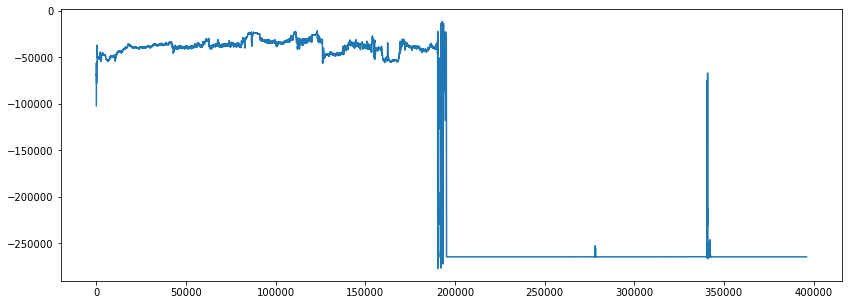

In [46]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'])
plt.show()

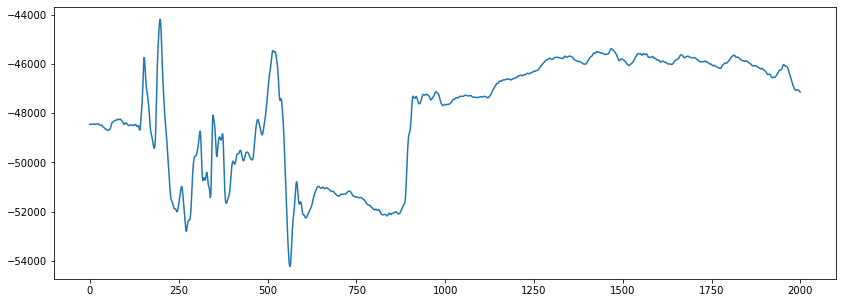

In [43]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'][2000:4000])
plt.show()

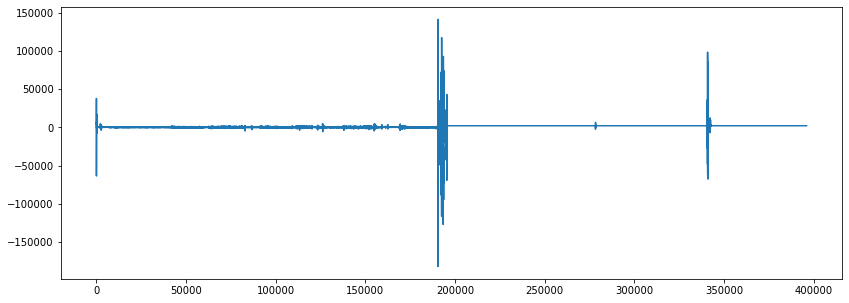

In [44]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'])
plt.show()

In [1]:
#### plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'][2000:4000])
plt.show()

NameError: name 'plt' is not defined

[36, 53, 181, 293, 404, 521, 539, 684, 816, 939, 977, 1084, 1110, 1222, 1353, 1467, 1480, 1641, 1754, 1868, 1978, 2067, 2202, 2304, 2426, 2567, 2600, 2710, 2734, 2878, 2903, 3059, 3085, 3237, 3349, 3473, 3497, 3673, 3789, 3825]


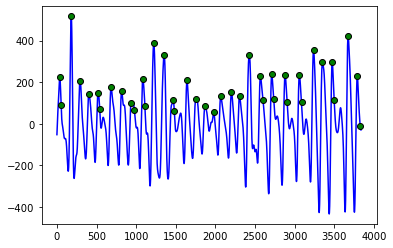

C:\Users\Guy\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


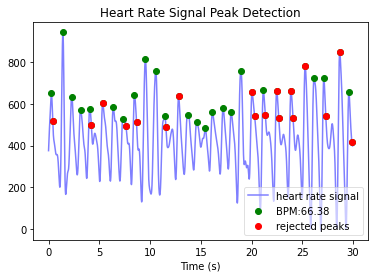

In [85]:
import heartpy as hp

#signal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][0:3840] #first 30 sec
#signal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][3840:7680] # 2nd 30 sec
signal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][7680:11520] #3rd 30 sec
filtered = hp.filter_signal(signal, [0.7, 3.5], sample_rate=128.0,
                            order=3, filtertype='bandpass')

wd_no_correction, m_no_correction = hp.process(filtered, sample_rate=128.0, clean_rr = True)
print(wd_no_correction['peaklist'])
plt.plot(filtered, '-bD',marker="o", c="blue", mfc="green",  mec='k', markevery=wd_no_correction['peaklist'])
plt.show()

working_data_correction, measures_correction = hp.process(filtered,sample_rate=128.0, bpmmax=180)
hp.plotter(working_data_correction, measures_correction)
#working_data, measures = hp.process_segmentwise(signal, sample_rate=128.0, segment_width = 40, segment_overlap = 0.25, calc_freq=True, reject_segmentwise=True, report_time=True)
#hp.segment_plotter(working_data, measures)